# Preliminary search

With a focus on health related data, we explore an online dataset 'Diabetes' and explore its structure, inconsistencies, useful packages for exploratory data analysis (EDA), and example code which has been uploaded online. The dataset lends itself naturally to a binary classification problem which we will see an example of; We will try and expand on this example code by cleaning/preprocessing the data before testing.  

<h2>Diabetes Dataset</h2>

This Dataset contains 9 attributes -

Pregnancies: Number of pregnancies : Integer

Glucose: Glucose level in blood : Integer

BloodPressure: Integer

SkinThickness: Integer

Insulin: Integer

BMI: Body mass index : Float

DiabetesPedigreeFunction: To express the Diabetes percentage : Float

Age: Integer

Outcome: 1=Yes, 0=No :Integer

Outcome being stored as an integer is useful for the task of binary classifiation as it allows for a simple decision boundary (<.5 or >=.5) for each outcome.

<h3>Inconsistencies & Packages</h3>

The Outcome Attribute in the dataset suggests a binary classification task and the data is stored in a comma seperated values file (.csv), Below we import some useful packages to import and analyse the data.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Pandas is a useful package for creating objects such as dataframes or Importing the data, whilst numpy is imported for array/ matrix manipulation as it deals well with linear algebra task. Most if not all of the required linear algebra tools could be found in scipy, however numpy is computationally faster which is useful for the data analysis of large amounts of data.

Tensorflow is a library used for the creatation of DeepLearning Models which we will use in our binary classification task. PyTorch would have been another good library to use for the deep learning model however I am more comfortable using tensorflow and so used it instead, this reflecrts my own personal comfort zone and is something I could work on in future prjects. 

Sklearn is a large resource with many useful applications, here we simply install the required functions for splitting and transforming the data and also for the creation of a confusion matrix for Testing. Sklearn also contains a large library of dummy datasets which can be used for testing models and learning new techniques.

Seaborn and MatplotLib are packages used for visualising our data, which can be useful for EDA and also visualising performance. For the next project I would like to be more comfortable using seaborn for python and also GGplot for R as I have limited experience using both and through reading example code online found them both to be quite powerful tools.



Below we will import the dataset and use some built in functions to explore the data

In [57]:
dataset = pd.read_csv('https://github.com/a-matson/DST_ASS0/blob/main/Josh/Data/diabetes.xls?raw=true') #We use pandas to download the dataset from github
X = dataset.iloc[:, :-1].values #X contains the attributes we wish to use for binary classifcation
y = dataset.iloc[:, -1].values #Y contains the response variables to the given data

In [58]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


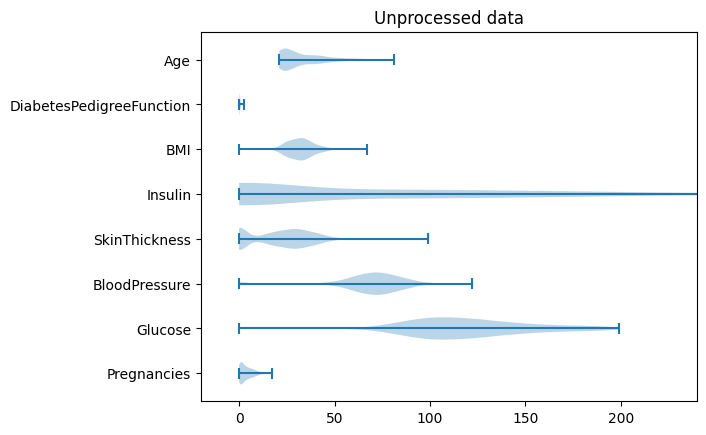

In [60]:
datasett = dataset. iloc[:, :-1]
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(datasett.columns)
plt.figure()
ax = plt.subplot(111)
plt.violinplot(datasett,pos, vert=False)
plt.title("Unprocessed data")
ax.set_yticks(pos)
ax.set_yticklabels(label)
ax.set_xlim(left=-20, right=240) #note we choose to not include all of the insulin violin so that we can gain a better view of the other attributes distributions.
plt.show()

The description of the dataset shows that there are no missing values for data which allows for easier data analysis. However the scales of certain attributes are different (the range for insulin is 2 orders of magnitude bigger than the range for DiabetesPedigreeFunction), this can cause problems when analysing the importance of each attribute and should be addressed. In the Example binary classication we will give below, the sklearn package is used for this task.

Through inspection, Over 25% of Skinthickness data is recorded as 0, this is not possible and we will edit the provided code and explore whether addressing this issue can improve model performance. Furthermore, the maximum valiue for Insulin seems to be very large when compaered to the rest of the values and should be explored.

Below we start by preprocessing the data in the hopes of improving the model given online.

In [73]:
dataset2 = pd.read_csv('https://github.com/a-matson/DST_ASS0/blob/main/Josh/Data/diabetes.xls?raw=true')

#dataset2['Insulin']=dataset2['Insulin'].apply(lambda x: [y if y <= (np.mean(df['Insulin'])+2*np.std(df['Insulin'])) else np.mean(df['Insulin'])+2*np.std(df['Insulin']) for y in x])
#Above we make an attempt to replace high insulin values with 2std above the mean but I am unable to make this work.

dataset2['SkinThickness']=dataset2['SkinThickness'].replace(0,0.5*(dataset2['SkinThickness'].mean())) #we set 0 skin thickness = mean*0.5

X2 = dataset2.iloc[:, :-1].values
y2 = dataset2.iloc[:, -1].values
dataset3 = dataset2. iloc[:, :-1]
dataset2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,23.571469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,12.314037,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,10.268229,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


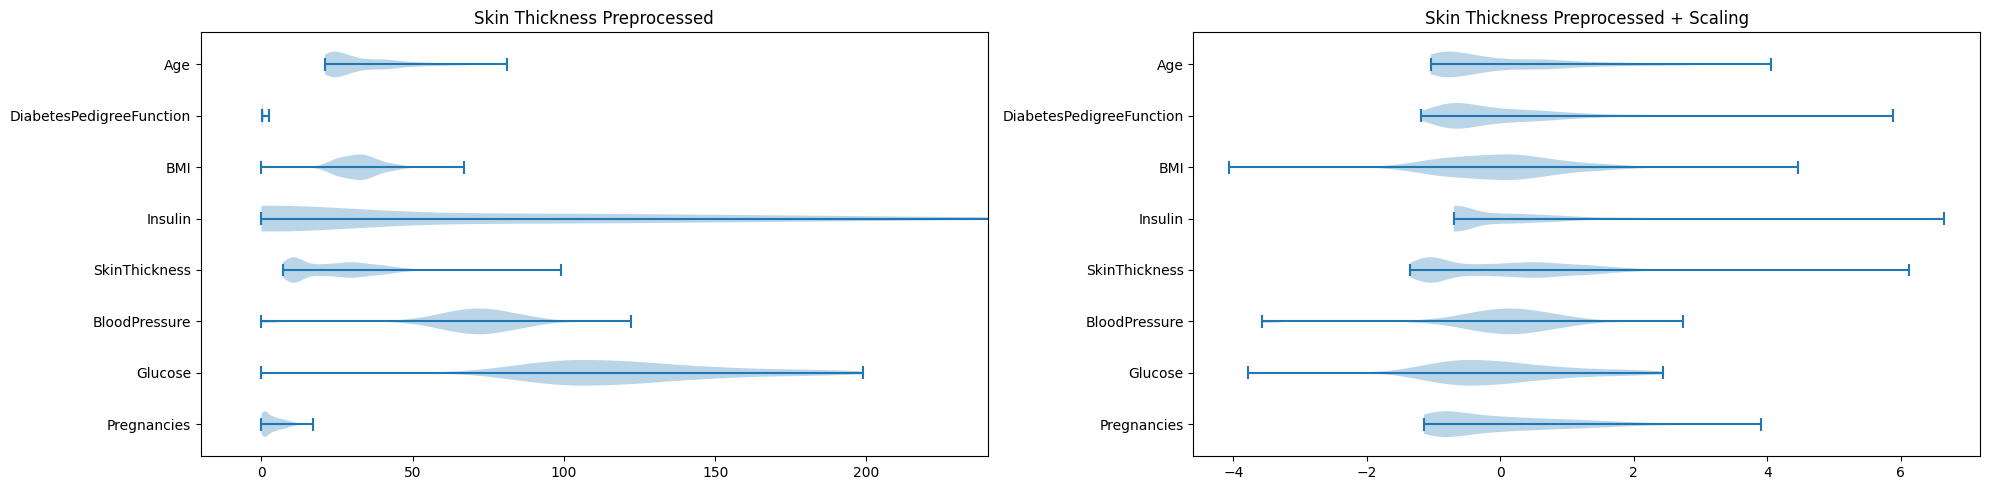

In [74]:
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(dataset3.columns)
plt.figure(figsize=(20,5))
ax = plt.subplot(121)
plt.violinplot(dataset3,pos, vert=False)         #Here we create a violin plot of the preprocessed data
plt.title("Skin Thickness Preprocessed")
ax.set_yticks(pos)
ax.set_yticklabels(label)
ax.set_xlim(left=-20, right=240)

sc = StandardScaler()              #Scaling the data
X2scaled = sc.fit_transform(X2)

ax = plt.subplot(122)
plt.violinplot(X2scaled,pos, vert=False)
plt.title("Skin Thickness Preprocessed + Scaling")      #Here we create a violin plot of the scaled data
ax.set_yticks(pos)
ax.set_yticklabels(label)
plt.tight_layout()
plt.show()


Here the violin plot shows us that the skin thickness data now appears to be more realistic (with a min of 7mm) and will hopefully lead to better results. The Violin plot of scaled values highlights how the variables are scaled for better analysis.

<h2>Below we use code provided online (Kaggle) to create a neural network to complete the binary classification task. In addition they calculate a number of test statistics and represent the confusion matrix of the results in a heatmap</h2>

In [75]:
def model_data(X,y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Build the ANN
    classifier = tf.keras.Sequential([
        tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=8),
        tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'),
        tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
    ])

    # Compile the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the ANN to the Training set
    classifier.fit(X_train, y_train, batch_size=10, epochs=100)

    # Make Predictions
    y_pred = (classifier.predict(X_test) > 0.5)

    # Create a Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the Confusion Matrix
    sns.heatmap(cm, fmt=".0f", xticklabels=['Diabetes_yes', 'Diabetes_no'],
                yticklabels=['Diabetes_yes', 'Diabetes_no'], annot=True)

    # Predict a New Data Point
    new_data = np.array([[1, 97, 64, 0, 0, 25.6, 0.201, 30]])
    new_data = sc.transform(new_data)
    outcome = classifier.predict(new_data)
    print("The Outcome of the Patient is:", "Diabetes" if outcome > 0.5 else "No Diabetes")

    # Calculate Performance Metrics
    TP, FP, FN, TN = cm.ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    FDR = FP / (TP + FP)
    ACC = (TP + TN) / (TP + FP + FN + TN)

    print("Recall:", TPR)
    print("Specificity:", TNR)
    print("Precision:", PPV)
    print("Negative Predictive Value:", NPV)
    print("False Positive Rate:", FPR)
    print("False Negative Rate:", FNR)
    print("False Discovery Rate:", FDR)
    print("Accuracy:", ACC)

    return None


Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.6352
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.6515
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7508
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7638
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7671
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7687
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7736
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7769
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7704
Epoch 11/

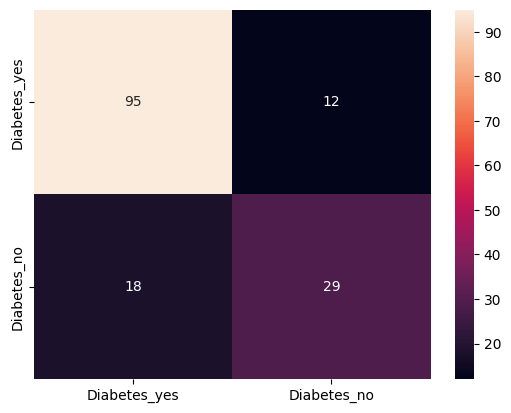

In [76]:
model_data(X,y)

Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.6254
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6515
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7231
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7606
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7638
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7606
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7720
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7687
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7622
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7785
Epoch 11/

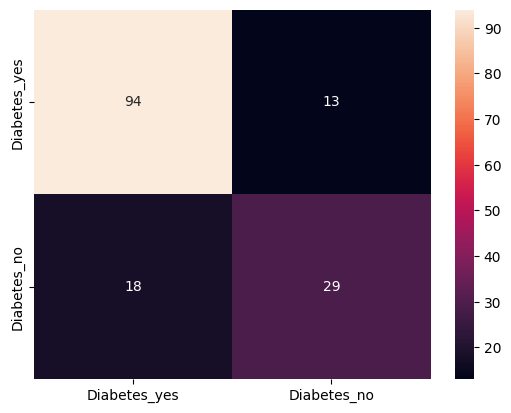

In [77]:
model_data(X2,y2)

Original data:<br>
Recall: 0.8407079646017699<br>
Specificity: 0.7073170731707317<br>
Precision: 0.8878504672897196<br>
Negative Predictive Value: 0.6170212765957447<br>
False Positive Rate: 0.2926829268292683<br>
False Negative Rate: 0.1592920353982301<br>
False Discovery Rate: 0.11214953271028037<br>
Accuracy: 0.8051948051948052<br>

Preprocessed Data:<br>
Recall: 0.8392857142857143<br>
Specificity: 0.6904761904761905<br>
Precision: 0.8785046728971962<br>
Negative Predictive Value: 0.6170212765957447<br>
False Positive Rate: 0.30952380952380953<br>
False Negative Rate: 0.16071428571428573<br>
False Discovery Rate: 0.12149532710280374<br>
Accuracy: 0.7987012987012987<br>

As can be seen from the results produced, removing zeros from the skin thickness attribute does not improve the results of the model of this dataset.A possible reason for this could be that skin thickness holds no weight over predicting diabetes. 
I would choose to use the False negative and False positive rates as one of the most important metrics for model performance. This is due to the focus on health data for the group as misdiagnosing a patient can either lead to death or unnecassary treament which can cause many ill effects, this makes false negatives be of major importance when deciding on the validaty of the model. 

<h2>Individual Reflection</h2>

Listed in my personal data file there are multiple datasets and explorations of such datasets, through reading these resources I became aware of a loose structure followed by the example EDA resources. That being to visualise the data in some way and to use this visual and vague information to clean/ remove data where necassary. I also became aware of the the practice of replacing ordered categorical variables (eg. 'low risk', 'medium risk', 'high risk') into integers for analysis. 

However past the preprocessing stage, I began to feel much less comfortable with my understanding of the code provided, mainly creating neural networks and the effect of adding, changing or removing layers in a deep neural network. Furthermore a better unerstanding of dataframe manipulation would allow me to explore the data quicker and more efficiently. As stated above, a better familiarity of GGplots (R) and seaborn (Python) would help with creating good visualisations of data. Also a better understanding of scipy or SKlearn would be of use for me due to the large quantity of built in functions.

Despite this I still feel relatively comfortable with the content at present, with previous courses involving collaborative coding helping greatly. I hope to gain more practice using the github online/desktop environment in the coming assessment as during this project we completed individual notebook files, which i feel has not let me grasp the technicalities of GitHub just yet.

During the exploration of the Kaggle submitted code above, I decided to look into the Standard Scalar and Tramsform Documentation. Highlighted in this documentation was that the functiuon StandardScalar() is sensitive to outliers, which should be considered before use in the EDA stage. Standard scalar performs the simple calcuation of mean (u) and standard deviation (std) and replaces each variable with (x-u)/(std). As can be seen by the violin plot above, the scale of each attribute becomes much more similar to each other, allowing for better model prediction as larger scales can dominate models.